# To Do List

~~1) Load data~~

~~2) Load metadata~~

3) Clean metadata

4) Make a function to subset time from data for transform

5) Figure out where normalization should be implemented

6) Figure out how to group spectra from different trials

7) Implement statistics on grouped spectra

# Erin Suggestions to do list

Make an example input coding csv for greg to practice with

Send it to greg to see if it is useful

Build pipeline to merge indicator sheet with dataset

Give concrete timelines for when we can get something done

be very specific "we need to have this amount/type of data by this date. If not here is plan B"

Bottomline, make sure greg has a-oked a workflow he can do in 30 seconds with a timeline

One possible thing to do with the is there an error senario is to do GPT call via API. Con of this is it is not obvious if this advances goal

One possible workflow split: Sam does data cleaning from metadata, Nick gets Greg to do the indicator variable input

Meet more the two of us and figure out our work dynamic, for example weekly check-in for team building purposes

A good consulting trick is to say "ok I am hearing X. What part or percent of the paper/project does this represent? Alternatively where does this slot into the overall project?" This is actually a great opportunity to hear the client say the same thing in different words or from a different angle

Another good focus is to find out if Greg has a journal in mind as this can give us a format to focus on

# Data Load

In [1]:
import mne, os
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt

In [2]:
data_root = os.path.join(os.getcwd(), 'Examples2024', '00000016-APDx20974')
data_path = os.path.join(data_root, '00000016-APDx20974[001].edf')
meta_path = os.path.join(data_root, '00000016-APDx20974.rml')

In [3]:
data_root = os.path.join(os.getcwd(), 'Examples2024', '00000020-APDx20974')
data_path = os.path.join(data_root, '00000020-APDx20974[001].edf')
meta_path = os.path.join(data_root, '00000020-APDx20974.rml')

In [4]:
# Load an EDF file
raw = mne.io.read_raw_edf(data_path, preload=True)

# Print information about the file
print(raw.info)

# Print all channel names to review them
print(raw.info['ch_names'])

# Subset to only EEG Channels and print general data
selected_channels = raw.copy().pick(['EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1'])

display(selected_channels)

Extracting EDF parameters from /home/sam/Classes/Stats/Consulting/EEG_Consulting/Examples2024/00000020-APDx20974/00000020-APDx20974[001].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9201999  =      0.000 ... 46009.995 secs...


/tmp/ipykernel_437381/46973224.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(data_path, preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: EEG C3-A2, EEG C4-A1, EEG O1-A2, EEG O2-A1, EMG Chin, EMG Aux1, ...
 chs: 17 EEG
 custom_ref_applied: False
 highpass: 0.3 Hz
 lowpass: 35.0 Hz
 meas_date: 2016-10-06 20:16:29 UTC
 nchan: 17
 projs: []
 sfreq: 200.0 Hz
 subject_info: 3 items (dict)
>
['EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EMG Chin', 'EMG Aux1', 'ECG V', 'Flow Patient-0', 'Flow Patient-1', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'PulseRate', 'EEG A1-A2', 'PPG', 'Technical']


Measurement date,"October 06, 2016 20:16:29 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.30 Hz
Lowpass,35.00 Hz


['EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EMG Chin', 'EMG Aux1', 'ECG V', 'Flow Patient-0', 'Flow Patient-1', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'PulseRate', 'EEG A1-A2', 'PPG', 'Technical']
Using matplotlib as 2D backend.


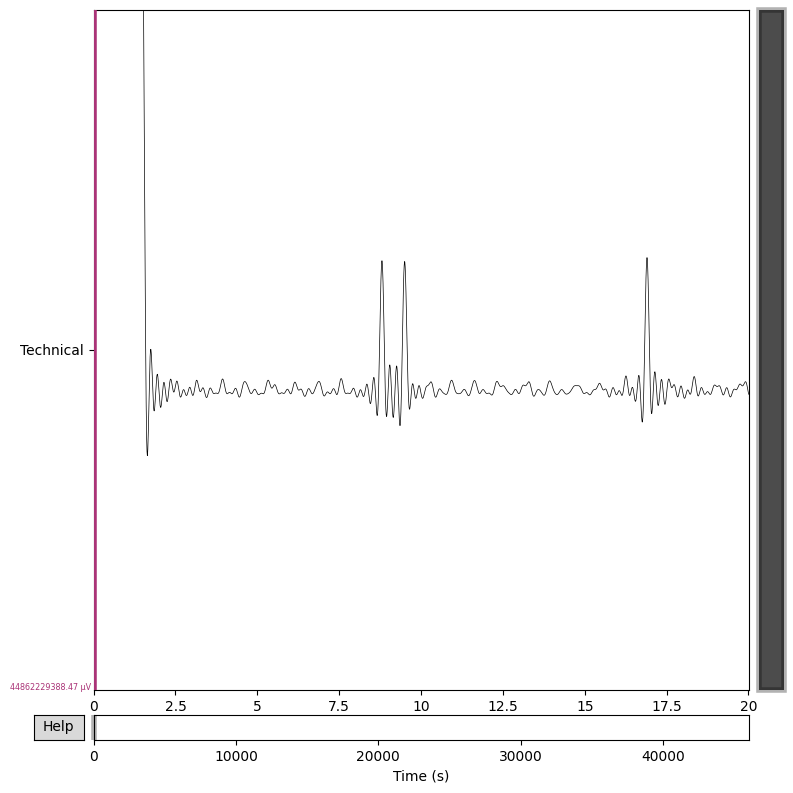

In [5]:
print(raw.info['ch_names'])
tech = raw.copy().pick(['Technical'])

tech.plot(start=0, duration=20, scalings='auto', title='Selected EEG Channels')
plt.show()


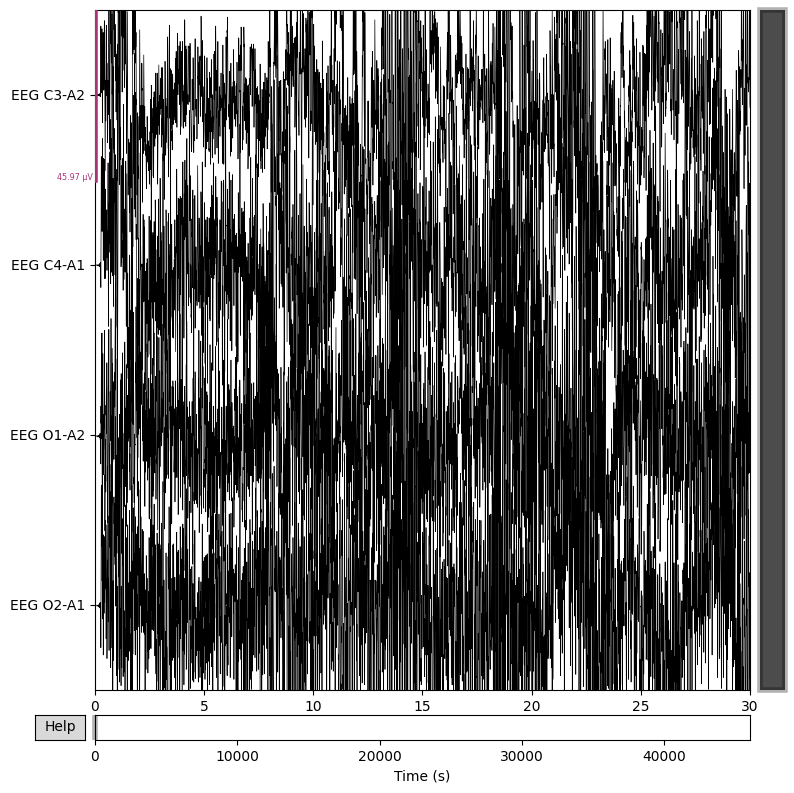

In [6]:
# Visualize the EEG time series for the selected channels
selected_channels.plot(start=0, duration=30, scalings='auto', title='Selected EEG Channels')
plt.show()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows


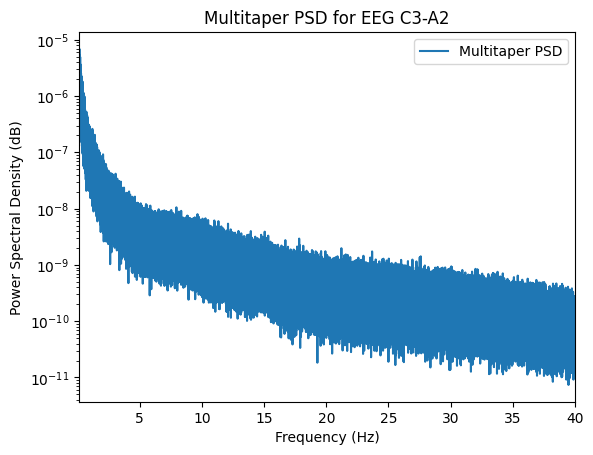

In [7]:
# To visualize the multitaper spectral estimation
# Compute the Power Spectral Density (PSD) using the multitaper method
channel_names = ['EEG C3-A2']
selected_data = raw.copy().pick_channels(channel_names)
sfreq = selected_data.info['sfreq']
# Extract the data from the Raw object
data, times = selected_data[:, :]

psds, freqs = mne.time_frequency.psd_array_multitaper(data, sfreq=sfreq, fmin=0.1, fmax=40, adaptive=False, normalization='length', verbose=True)
# Plot the Power Spectral Density (PSD) for the selected EEG channels
plt.semilogy(freqs, psds.T, label='Multitaper PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Multitaper PSD for EEG C3-A2')
plt.xlim([0.1, 40])  # Adjust the frequency range as needed
plt.legend()
plt.show()


In [8]:
selected_data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [9]:
df = raw.to_data_frame()

df

,time,EEG C3-A2,EEG C4-A1,EEG O1-A2,EEG O2-A1,EMG Chin,EMG Aux1,ECG V,Flow Patient-0,Flow Patient-1,Effort THO,Effort ABD,SpO2,Pleth,PulseRate,EEG A1-A2,PPG,Technical
0,0.000,0.122100,0.122100,0.1221,0.1221,0.036630,0.036630,2.442002,1.525902e+03,1.525902e+03,1.525902e+03,1.525902e+03,-2.499855e-08,1525.902190,7.489445e-09,0.1221,1.000000e+08,3.276800e+10
1,0.005,0.122100,0.122100,0.1221,0.1221,0.036630,0.036630,2.442002,2.395666e+05,-1.220845e+05,-6.295883e+05,-6.300145e+05,-1.979295e+05,4739.596062,-1.730835e+05,0.1221,9.867598e+07,3.315135e+10
2,0.010,0.122100,0.122100,0.1221,0.1221,0.036630,0.036630,2.442002,6.607156e+05,2.395666e+05,-9.506371e+05,-9.506371e+05,-3.970921e+05,3992.249100,-3.472290e+05,0.1221,9.734337e+07,3.349124e+10
3,0.015,0.122100,0.122100,0.1221,0.1221,0.036630,0.036630,2.442002,9.475853e+05,5.771742e+05,-1.545511e+06,-1.533957e+06,-5.970606e+05,187.483240,-5.220628e+05,0.1221,9.603436e+07,3.378537e+10
4,0.020,0.122100,0.122100,0.1221,0.1221,0.036630,0.036630,2.442002,1.039139e+06,6.973373e+05,-2.024872e+06,-2.012665e+06,-7.974025e+05,-1981.123459,-6.972069e+05,0.1221,9.478161e+07,3.403212e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201995,46009.975,0.366300,0.854701,-0.1221,-0.3663,-2.014652,2.307692,7.326007,-5.111772e+05,1.392088e+06,3.003496e+06,2.874058e+06,9.566811e+05,2835.735705,8.368278e+05,0.1221,1.054802e+08,3.032084e+10
9201996,46009.980,0.854701,0.854701,-0.3663,-0.3663,-0.915751,2.014652,-7.326007,-5.172808e+05,1.509117e+06,3.395132e+06,3.248646e+06,7.710786e+05,4957.823348,6.744454e+05,0.3663,1.046198e+08,3.086687e+10
9201997,46009.985,0.854701,0.610501,-0.3663,-0.1221,-1.282051,1.282051,-17.094017,-5.294881e+05,1.696074e+06,3.989333e+06,3.814773e+06,5.822166e+05,2842.766333,5.092277e+05,0.3663,1.036196e+08,3.138928e+10
9201998,46009.990,0.610501,0.366300,-0.1221,0.1221,-1.575092,-0.036630,-12.210012,-5.355917e+05,1.472496e+06,3.395132e+06,3.260853e+06,3.904831e+05,-913.893654,3.415144e+05,0.3663,1.024998e+08,3.188319e+10


# Load Metadata

In [10]:
def get_namespaces(file_path):
    """
    Parses the XML file and extracts namespaces as a dictionary.
    Namespaces in XML are declared in the root element or throughout the document.
    
    Args:
    - file_path: Path to the XML file.
    
    Returns:
    A dictionary with namespace prefixes as keys and URIs as values.
    """
    namespaces = {}
    for event, elem in ET.iterparse(file_path, events=('start-ns',)):
        prefix, uri = elem
        namespaces[prefix] = uri
    return namespaces

def xml_to_dict(element, namespaces):
    """
    Recursively convert an XML element and its children into a dictionary.
    
    Args:
    - element: The XML element to convert.
    - namespaces: A dictionary of XML namespaces.
    
    Returns:
    A dictionary representation of the XML element.
    """
    # Base case: If the element has no children, return its text content
    # or an empty string if the content is None.
    if not list(element):  # Checks if the element has no children
        return element.text or ''
    
    # Recursion: Convert children into dictionary entries
    element_dict = {}
    for child in element:
        child_tag = child.tag.split('}')[-1]  # Removes the namespace URI if present
        child_dict = xml_to_dict(child, namespaces)  # Recursive call
        
        # Handle cases where tags are repeated by aggregating them into lists
        if child_tag in element_dict:
            if not isinstance(element_dict[child_tag], list):
                # Convert existing entry into a list
                element_dict[child_tag] = [element_dict[child_tag]]
            element_dict[child_tag].append(child_dict)
        else:
            element_dict[child_tag] = child_dict
    
    return element_dict

def convert_rml_to_dict(metadata_path):
    """
    Reads a .rml file, parses it, and converts it into a dictionary.
    
    Args:
    - metadata_path: Path to the .rml file.
    
    Returns:
    A dictionary representing the .rml file's structure.
    """
    # Read and parse the .rml file
    tree = ET.parse(metadata_path)
    root = tree.getroot()

    # Generate namespaces dictionary automatically
    namespaces = get_namespaces(metadata_path)

    # Convert the root XML element to a dictionary
    return xml_to_dict(root, namespaces)

xml_dict = convert_rml_to_dict(meta_path)
xml_dict.keys()

dict_keys(['Patient', 'ChannelConfig', 'Acquisition', 'CustomEventTypeDefs', 'AcquisitionCommentDefs', 'ScoringData', 'AnalysisOptions', 'ReportCalcOptions', 'EventFilters', 'TrendChannelMappings'])

In [11]:
print(sum([len(x) > 1 for x in xml_dict['ScoringData']['Events']['Event']]))

xml_dict['ScoringData']['Events']['Event']

151


[{'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'HRBefore': '80', 'HRExtreme': '92'},
 {'HRBefore': '84', 'HRExtreme': '93'},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'HRBefore': '89', 'HRExtreme': '92'},
 {'HRBefore': '90', 'HRExtreme': '91'},
 {'HRBefore': '90', 'HRExtreme': '91'},
 {'HRBefore': '91', 'HRExtreme': '107'},
 {'HRBefore': '93', 'HRExtreme': '110'},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 {'ChannelFail': ''},
 '',
 {'ChannelFail': ''},
 {'Channe

In [12]:
len(xml_dict['ScoringData']['Events']['Event'])

751

In [13]:
xml_dict['EventFilters']

{'CAMinDur': '10',
 'OAMinDur': '10',
 'MAMinDur': '10',
 'HypMinDur': '10',
 'ConfirmHypsWithDesatsAndOrArousals': 'false',
 'UseAutonomousResponsesForEegArousal': 'false',
 'RequiredHrIncreaseForAutonomousResponse': '5',
 'ReraMinDur': '10',
 'BradyMinDur': '5',
 'TachyMinDur': '5',
 'PTTDropMinDecrease': '20',
 'MinRelativeSpO2Drop': '3',
 'KeepEventsInWake': 'false',
 'KeepLegMvtEventsInWake': 'false',
 'FilterLegMvtEventsNearRespEvents': 'true',
 'LegMvtEventDurationFromRespEvent': '0.5',
 'FilterLegMvtEventsBetweenRespEvents': 'false',
 'FilterLegMvtEventsNotPLMs': 'false',
 'DisallowOverlappingLegMvtEvents': 'false'}

In [14]:
# Number of minutes of recording
len(raw.times)/(60*sfreq)

766.8333333333334

In [15]:
766-151

615

In [16]:
41934/(60)

698.9

In [17]:
len(raw.times)/sfreq

46010.0

In [28]:
clock_t0 = xml_dict['Acquisition']['Sessions']['Session']['RecordingStart']
t_lightOFF = xml_dict['Acquisition']['Sessions']['Session']['LightsOff']
t_lightON = xml_dict['Acquisition']['Sessions']['Session']['LightsOn']
print(f'Recording began at {clock_t0}, lights OFF at: {t_lightOFF} seconds, lights ON at: {t_lightON} seconds')

Recording began at 2016-10-06T20:16:29, lights OFF at: 10488 seconds, lights ON at: 41934 seconds


In [19]:
xml_dict['Acquisition']['Sessions']['Session']

{'RecordingStart': '2016-10-06T20:16:29',
 'Duration': '46010',
 'LightsOff': '10488',
 'LightsOn': '41934',
 'Segments': {'Segment': {'StartTime': '2016-10-06T20:16:29',
   'Duration': '46010'}}}

In [30]:
10488/3600

2.9133333333333336

In [10]:
def search_annotations_in_dict(xml_dict):
    # Potential keys where annotations might be stored
    potential_keys = ['CustomEventTypeDefs', 'AcquisitionCommentDefs', 'ScoringData']
    
    annotations = {}
    
    for key in potential_keys:
        if key in xml_dict:
            # Assuming annotations could be nested, we try to capture any level of detail
            annotations[key] = xml_dict[key]
            
    return annotations

# Use the function to search for annotations within the parsed RML dictionary
annotations_found = search_annotations_in_dict(xml_dict)

# Printing out annotations for inspection
for key, value in annotations_found.items():
    print(f"Key: {key}, Value: {value}\n")


Key: CustomEventTypeDefs, Value: {'CustomEventTypeDef': {'States': {'State': ['0.0 LPM', '0.5 LPM', '1.0 LPM', '1.5 LPM', '2.0 LPM', '2.5 LPM', '3.0 LPM', '3.5 LPM', '4.0 LPM', '4.5 LPM', '5.0 LPM']}}}

Key: AcquisitionCommentDefs, Value: {'AcquisitionCommentDef': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']}

Key: ScoringData, Value: {'LastModified': '2018-09-18T13:19:45', 'Events': {'Event': [{'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'ChannelFail': ''}, {'Channe

In [11]:
def extract_relevant_annotations(scoring_data):
    # Initialize containers for different types of annotations
    channel_fail_events = []
    comments_with_timestamps = {}
    
    # Check if 'Events' key exists in 'ScoringData'
    if 'Events' in scoring_data and 'Event' in scoring_data['Events']:
        for event in scoring_data['Events']['Event']:
            # Extract ChannelFail events
            if 'ChannelFail' in event and event['ChannelFail']:
                channel_fail_events.append(event['ChannelFail'])
            
            # Extract other comments, like 'Comment' or specific conditions
            # Assume 'timestamp' is the key where the timestamp is stored in each event
            if 'Comment' in event and event['Comment']:
                comment = event['Comment']
                timestamp = event.get('timestamp', 'unknown')  # Provide a default value in case timestamp is missing
                
                # Check if this comment has already been recorded
                if comment in comments_with_timestamps:
                    # Append the new timestamp to the existing list for this comment
                    comments_with_timestamps[comment].append(timestamp)
                else:
                    # Otherwise, start a new list with this timestamp
                    comments_with_timestamps[comment] = [timestamp]
    
    return channel_fail_events, comments_with_timestamps

# Try to see commentary in the file
scoring_data = xml_dict.get('ScoringData', {})
channel_fail_events, other_comments = extract_relevant_annotations(scoring_data)

# Display the findings
print("Channel Fail Events:")
for event in channel_fail_events:
    print(f"  - {event}")

print("\nOther Comments:")
for comment in other_comments:
    print(f"  - {comment}")


Channel Fail Events:

Other Comments:
  - possible premayure beat
  - possible premature beat
  - premature beats
  - quadrigeminy


# Metadata Cleaning

## Note it is essential to properly install the API Key
https://platform.openai.com/docs/quickstart?context=python

In linux at least, be sure to NOT include quotation marks with API string in the permaent bash variable

In [17]:
from openai import OpenAI

os.environ.get("OPENAI_API_KEY")
client = OpenAI()

In [87]:
# Test senarios where the LLM correctly identified rejection
prompt_var = ['possible premayure beat',
 'possible premature beat',
 'premature beats',
 'quadrigeminy',
            'electrode fell off at midnight']
prompt_var = ['possible premayure beat',
 'possible premature beat',
 'premature beats',
 'quadrigeminy',
            'electrode fll off at midnight']
prompt_var = ['possible premayure beat',
 'possible premature beat',
 'premature beats',
 'quadrigeminy',
            'electrode broke']
prompt_var = ['possible premayure beat',
 'possible premature beat',
 'premature beats',
 'quadrigeminy',
            'trace lost']
prompt_var = ['possible premayure beat',
 'possible premature beat',
 'premature beats',
 'quadrigeminy', 
              'trs lost']

In [18]:
prompt_var = ' ; '.join(list(other_comments.keys()))
prompt = f'You are a medical expert with expertise in analysis of EEG sleep studies. Here are comments entered by the EEG technician during a patient study, with unique comments seperated by " ; ":\n\n{prompt_var}\n\nPlease evaluate all of these comments for an event that can invalidate a dataset from being pooled in our research study. In particular you are looking for events related to leads falling off in the first 3 hours of sleep. Respond only with "Data Good" or "Data Rejected because [x]" where [x] is the concerning comment.'
print(prompt)

You are a medical expert with expertise in analysis of EEG sleep studies. Here are comments entered by the EEG technician during a patient study, with unique comments seperated by " ; ":

possible premayure beat ; possible premature beat ; premature beats ; quadrigeminy

Please evaluate all of these comments for an event that can invalidate a dataset from being pooled in our research study. In particular you are looking for events related to leads falling off in the first 3 hours of sleep. Respond only with "Data Good" or "Data Rejected because [x]" where [x] is the concerning comment.


In [88]:
prompt = f'Your task is to review comments made by an EEG technician during a patient\'s sleep study to determine if leads fell off or if any of the noted observations similarly indicate a physical problem with the recording such as losing the electrophysiologic trace. Only reject datasets based on quipment related technical issues. The comments you have to evaluate are seperated by " ; " and are:/n/n{prompt_var}\n\nIt\'s important to note that your evaluation should be based only on these comments. We specifically need to reject datasets if electordes fell off. Unless such an event is explicitly mentioned in the technician\'s comments, it should not be assumed to have occurred./nPlease analyze the provided comments and respond with "Data Good" if you believe the dataset remains valid. If you find a technical issue within the comments that would invalidate the dataset, please respond with "Data Rejected because [x]", where "[x]" is your specific reason based on the comments provided.'

temp = 10e-6
model="gpt-4"

# Build completion objects 
completion = client.chat.completions.create( 
  model=model, 
  temperature=temp,
  messages=[ 
    {"role": "user", "content": prompt} 
  ] 
) 

# Print the response to screen 
if completion.choices[0].message.content=='Data Good':
    print('Inclusion in study validated by technician comments')
else:
    print(f'Technician comments indicate rejection. GPT4.0 Identified the following specific issue(s): {completion.choices[0].message.content}')

Technician comments indicate rejection. GPT3.5 Identified the following specific issue(s): Data Rejected because electrode fell off at midnight.


# Indicator Variable Input